In [1]:
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [2]:
with open('sniff_data.json', 'r') as f:
    ts = json.load(f)

In [3]:
timestamps = []
packet_lengths = []
for t in ts:
    timestamps.append(t['ts'])
    packet_lengths.append(t['len'])
data = list(zip(timestamps, packet_lengths))
data = sorted(data, key=lambda x: x[0])

accumulated_by_ts = {}
for (t, length) in data:
    if t not in accumulated_by_ts:
        accumulated_by_ts[t] = length
    else:
        accumulated_by_ts[t] += length

/Users/aishwaryamandyam/anaconda3/envs/research/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Rate for Netflix'}, xlabel='Timestamp', ylabel='Rate'>

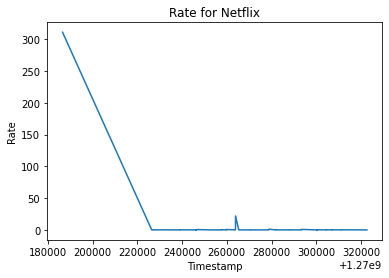

In [4]:
timestamps = []
rates = []
items = list(accumulated_by_ts.items())
for i in range(1, len(items)):
    timestamps.append(items[i-1][0])
    rates.append((items[i][0] - items[i-1][0])/items[i-1][1])
plt.xlabel('Timestamp')
plt.ylabel("Rate")
plt.title("Rate for Netflix")
sns.lineplot(timestamps, rates)